In [1]:
# Compare observations and model downscaling
# climatologies and pdfs

In [117]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore') #filter some warning messages

In [118]:
# locations
locs = ['Inshore','Shelf','Offshore']
depths = [['7m','29m'],['7m','88m'],['7m','540m']]
depnam = ['Surface','Bottom']
# data directory
#ooidir = '~/Documents/LargeData/QIN/OOI_Mooring/'
#glodir = '~/Documents/Largedata/QIN/downscaled_GCMs/'
ooidir = '../data/OOI_Mooring/'
glodir = '../data/downscaled_GCMs/'
# figure directory
#figdir = '/Users/sol/Google Drive/professional/research/projects/2020_QIN/figures/Comparison_Obs_Downscaled/'
figdir = '../figures/Comparison_Obs_Downscaled/'

# Climatologies

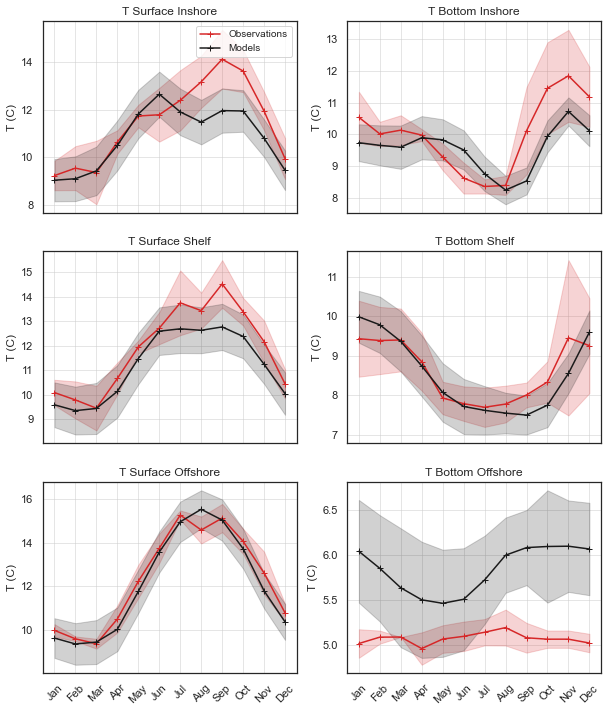

In [119]:
# Temperature
plt.figure(figsize=(10,12))
sb=1 # subplot
for i,ix in enumerate(locs): # locations
    for j in range(2): # depth
        plt.subplot(3,2,sb)
        
        # calculate climatology for OOI
        insh = pd.read_csv(ooidir+'QIN_'+locs[i]+'_TSDOS.csv', index_col=0)
        c1 = np.full((12),np.nan)
        s1 = np.full((12),np.nan)
        for k in range(12):
            c1[k] = np.nanmean(insh[insh['Month']==k+1]['T_'+depths[i][j]])
            s1[k] = np.nanstd(insh[insh['Month']==k+1]['T_'+depths[i][j]])
        
        plt.fill_between(range(12), c1+s1, c1-s1, color='tab:red', alpha=0.2)
        plt.plot(c1,'+-',color='tab:red', label='Observations')
        
        # calculate climatology downscaled models
        insh = pd.read_csv(glodir+'OOI_'+locs[i]+'_'+depnam[j].lower()+'_thetao.csv', index_col=0)
        mo = np.asarray([int(i[5:7]) for i in insh.index.values])
        
        c1 = np.full((12,9),np.nan)
        s1 = np.full((12,9),np.nan)
        mods = list(insh)
        for kk in range(9): # models
            for k in range(12): # month
                a = mo==k+1
                c1[k][kk] = np.nanmean(insh[a][mods[kk]])
                s1[k][kk] = np.nanstd(insh[a][mods[kk]])
        c2=c1.mean(axis=1)
        s2=s1.mean(axis=1)
        plt.fill_between(range(12), c2+s2, c2-s2, color='k', alpha=0.2)
        plt.plot(c2,'+-',color='k', label='Models')
        
        #plt.plot(ds.month, ds.sst,'+-',color='k')
    
        plt.grid(True, alpha=0.5)
        plt.ylabel('T (C)')
        if sb>4:
            plt.xticks(range(12),
                ['Jan','Feb','Mar','Apr','May','Jun',
                'Jul','Aug','Sep','Oct','Nov','Dec'],
                rotation=45)
        else:
            plt.xticks(range(12),
                [''])
        plt.title('T '+depnam[j]+' '+ix)
        if sb==1:
            plt.legend(fontsize='small', loc=0)
        sb += 1
plt.savefig(figdir+'T_climatologies_OOI.png')
plt.show()

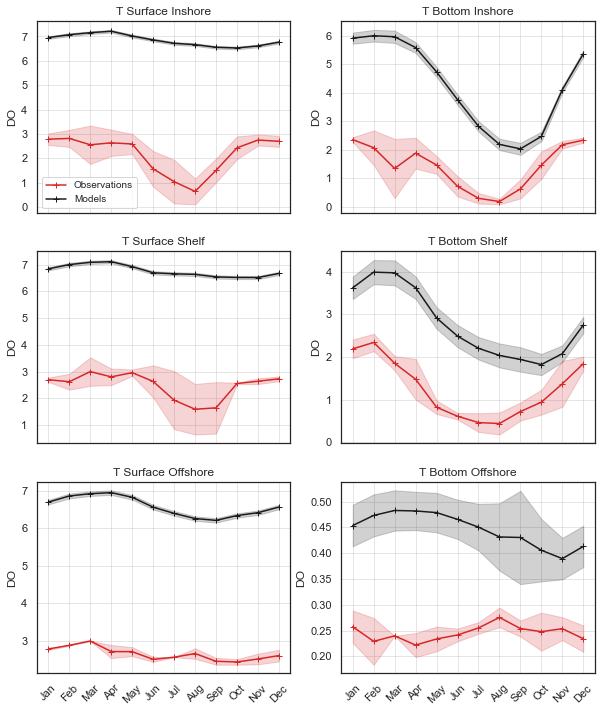

In [126]:
# DO
plt.figure(figsize=(10,12))
sb=1 # subplot
for i,ix in enumerate(locs): # locations
    for j in range(2): # depth
        plt.subplot(3,2,sb)
        
        # calculate climatology for OOI
        insh = pd.read_csv(ooidir+'QIN_'+locs[i]+'_TSDOS.csv', index_col=0)
        c1 = np.full((12),np.nan)
        s1 = np.full((12),np.nan)
        for k in range(12):
            ## not surer about the conversion!!! something is weird
            ## i didn't have to convert when did comparison w glorys
            c1[k] = np.nanmean(insh[insh['Month']==k+1]['DO_'+depths[i][j]]/100)
            s1[k] = np.nanstd(insh[insh['Month']==k+1]['DO_'+depths[i][j]]/100)
        
        plt.fill_between(range(12), c1+s1, c1-s1, color='tab:red', alpha=0.2)
        plt.plot(c1,'+-',color='tab:red', label='Observations')
        
        # calculate climatology downscaled models
        insh = pd.read_csv(glodir+'OOI_'+locs[i]+'_'+depnam[j].lower()+'_o2.csv', index_col=0)
        mo = np.asarray([int(i[5:7]) for i in insh.index.values])
        
        c1 = np.full((12,6),np.nan)
        s1 = np.full((12,6),np.nan)
        mods = list(insh)
        for kk in range(6): # models
            for k in range(12): # month
                a = mo==k+1
                c1[k][kk] = np.nanmean(insh[a][mods[kk]])
                s1[k][kk] = np.nanstd(insh[a][mods[kk]])
        c2=c1.mean(axis=1)
        s2=s1.mean(axis=1)
        plt.fill_between(range(12), c2+s2, c2-s2, color='k', alpha=0.2)
        plt.plot(c2,'+-',color='k', label='Models')
        
        #plt.plot(ds.month, ds.sst,'+-',color='k')
    
        plt.grid(True, alpha=0.5)
        plt.ylabel('DO')
        if sb>4:
            plt.xticks(range(12),
                ['Jan','Feb','Mar','Apr','May','Jun',
                'Jul','Aug','Sep','Oct','Nov','Dec'],
                rotation=45)
        else:
            plt.xticks(range(12),
                [''])
        plt.title('T '+depnam[j]+' '+ix)
        if sb==1:
            plt.legend(fontsize='small', loc=0)
        sb += 1
plt.savefig(figdir+'DO_climatologies_OOI.png')
plt.show()

# PDFs

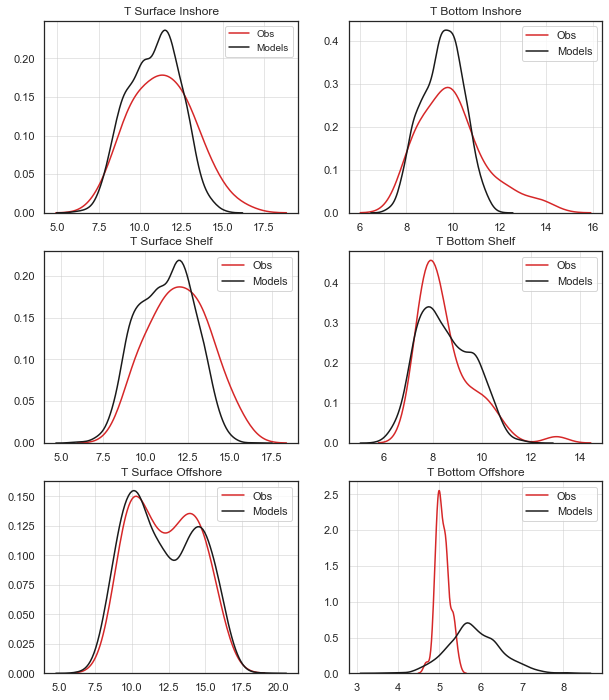

In [121]:
# Temperature
plt.figure(figsize=(10,12))
sns.set(style="white", palette="muted", color_codes=True)
sb=1 # subplot
for i,ix in enumerate(locs): # locations
    for j in range(2): # depth
        plt.subplot(3,2,sb)
        
        # OOI
        insh = pd.read_csv(ooidir+'QIN_'+locs[i]+'_TSDOS.csv', index_col=0)
        sns.distplot(insh['T_'+depths[i][j]], hist=False, kde_kws={"label": 'Obs'}, color="tab:red")
        
        # downscaled models
        insh = pd.read_csv(glodir+'OOI_'+locs[i]+'_'+depnam[j].lower()+'_thetao.csv', index_col=0)
        tmp = insh.to_numpy()
        tmp = np.reshape(tmp, (len(tmp)*9))
        sns.distplot(tmp, hist=False, kde_kws={"label": 'Models'}, color="k")
        
        plt.grid(True, alpha=0.5)
        plt.xlabel('')
        plt.title('T '+depnam[j]+' '+ix)
        if sb==1:
            plt.legend(fontsize='small', loc=0)
        sb += 1
plt.savefig(figdir+'T_PDF_OOI.png')
plt.show()

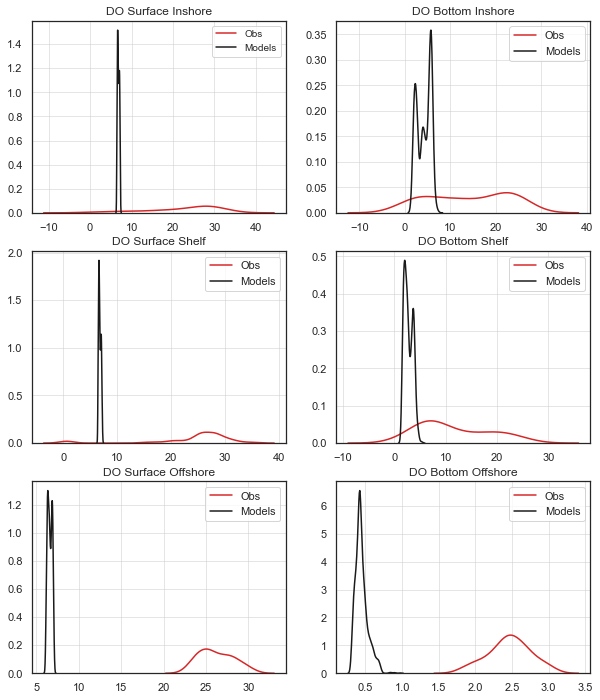

In [116]:
# Temperature
plt.figure(figsize=(10,12))
sns.set(style="white", palette="muted", color_codes=True)
sb=1 # subplot
for i,ix in enumerate(locs): # locations
    for j in range(2): # depth
        plt.subplot(3,2,sb)
        
        # OOI
        insh = pd.read_csv(ooidir+'QIN_'+locs[i]+'_TSDOS.csv', index_col=0)
        sns.distplot(insh['DO_'+depths[i][j]]/1.027, hist=False, kde_kws={"label": 'Obs'}, color="tab:red")
        
        # downscaled models
        insh = pd.read_csv(glodir+'OOI_'+locs[i]+'_'+depnam[j].lower()+'_o2.csv', index_col=0)
        tmp = insh.to_numpy()
        tmp = np.reshape(tmp, (len(tmp)*6))
        sns.distplot(tmp, hist=False, kde_kws={"label": 'Models'}, color="k")
        
        plt.grid(True, alpha=0.5)
        plt.xlabel('')
        plt.title('DO '+depnam[j]+' '+ix)
        if sb==1:
            plt.legend(fontsize='small', loc=0)
        sb += 1
plt.savefig(figdir+'DO_PDF_OOI.png')
plt.show()